# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mezohegyes
Processing Record 2 of Set 1 | ust-abakan
Processing Record 3 of Set 1 | portage
Processing Record 4 of Set 1 | olinda
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | daitari
Processing Record 7 of Set 1 | san policarpo
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | olafsvik
Processing Record 11 of Set 1 | paciran
Processing Record 12 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | fairbanks
Processing Record 15 of Set 1 | cedar city
Processing Record 16 of Set 1 | coquimbo
Processing Record 17 of Set 1 | turukhansk
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | filadelfia
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | caravelas
Processing Record 22 of Set 1 | san luis
Processing R

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          539
Lat           539
Lng           539
Max Temp      539
Humidity      539
Cloudiness    539
Wind Speed    539
Country       539
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,mezohegyes,46.3167,20.8167,40.82,72,2,8.50,HU
1,ust-abakan,53.8525,91.3742,22.91,63,0,11.18,RU
2,portage,41.1667,-81.1998,49.82,51,0,8.05,US
3,olinda,-8.0089,-34.8553,83.93,65,40,11.50,BR
4,kaitangata,-46.2817,169.8464,50.88,81,69,3.29,NZ


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,mezohegyes,46.3167,20.8167,40.82,72,2,8.50,HU
1,ust-abakan,53.8525,91.3742,22.91,63,0,11.18,RU
2,portage,41.1667,-81.1998,49.82,51,0,8.05,US
3,olinda,-8.0089,-34.8553,83.93,65,40,11.50,BR
4,kaitangata,-46.2817,169.8464,50.88,81,69,3.29,NZ


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

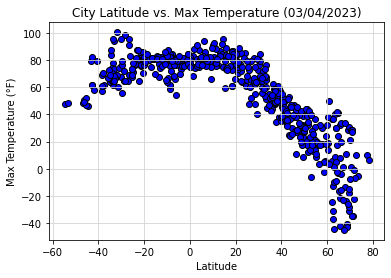

In [19]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature (03/04/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

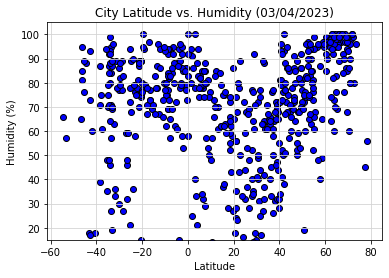

In [23]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity (03/04/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
# Save the figure
plt.savefig("output_data/fig2.png")
# Show plot
plt.show()



#### Latitude Vs. Cloudiness

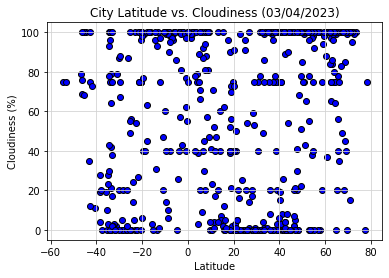

In [27]:

# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (03/04/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_data/fig3.png")

# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

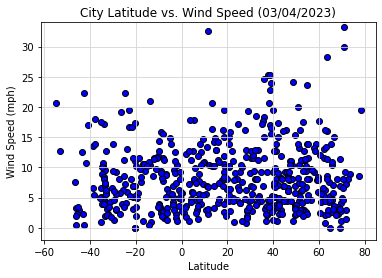

In [30]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed (03/04/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_data/fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,mezohegyes,46.3167,20.8167,40.82,72,2,8.50,HU
1,ust-abakan,53.8525,91.3742,22.91,63,0,11.18,RU
2,portage,41.1667,-81.1998,49.82,51,0,8.05,US
5,daitari,21.1000,85.7500,70.54,35,0,2.77,IN
6,san policarpo,12.1791,125.5072,76.66,85,47,10.45,PH


In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
southern_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
3,olinda,-8.0089,-34.8553,83.93,65,40,11.50,BR
4,kaitangata,-46.2817,169.8464,50.88,81,69,3.29,NZ
8,chuy,-33.6971,-53.4616,78.01,57,42,9.35,UY
10,paciran,-6.8767,112.3761,76.89,84,98,8.90,ID
12,busselton,-33.6500,115.3333,61.50,71,64,9.57,AU


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -1.41x + 99.5
The r-squared is: -0.889844980241172
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


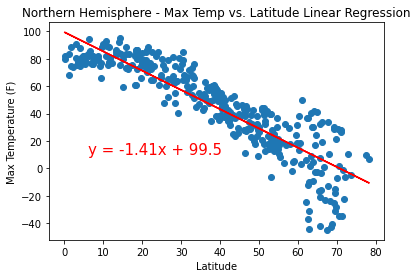

In [39]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

Regression line equation is: y = 0.36x + 82.04
The r-squared is: 0.4682134090226625
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


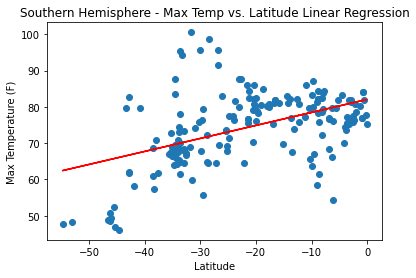

In [40]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

**Discussion about the linear relationship:** Tempuratures increase with proximity to the Equator, and likewise decrease with distance from the same. Tempuratures vary far more widely in the Southern hemisphere vs. the Northern hemisphere, which enjoys a much more consistent range, indicating a stronger coorelation betweeen tempurature and latitude in the Northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.54x + 47.28
The r-squared is: 0.45553120228582117
The regression does not display much of a correlation between the data sets.


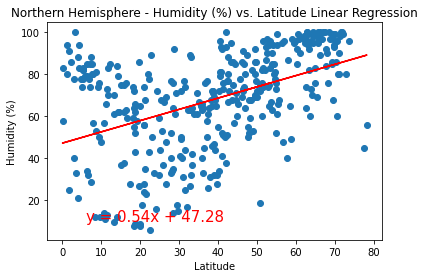

In [41]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

Regression line equation is: y = 0.36x + 81.86
The r-squared is: 0.24857446014229073
The regression does not display much of a correlation between the data sets.


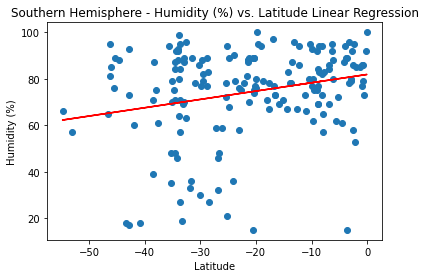

In [42]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

**Discussion about the linear relationship:** There is not a strong correlation in either hemisphere between Latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.57x + 34.91
The r-squared is: 0.2821778680668878
The regression does not display much of a correlation between the data sets.


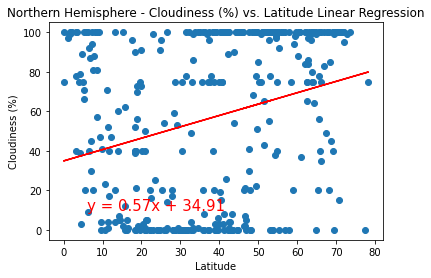

In [43]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = 0.94x + 80.0
The r-squared is: 0.3212257971310064
The regression does not display much of a correlation between the data sets.


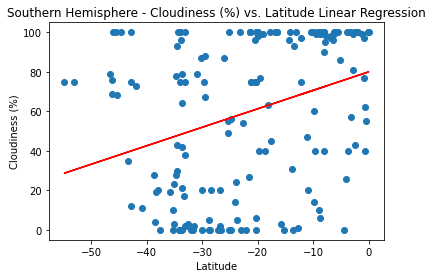

In [44]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

**Discussion about the linear relationship:** There is not a strong correlation in either hemisphere between Latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.01x + 8.15
The r-squared is: 0.04602495357344227
The regression does not display much of a correlation between the data sets.


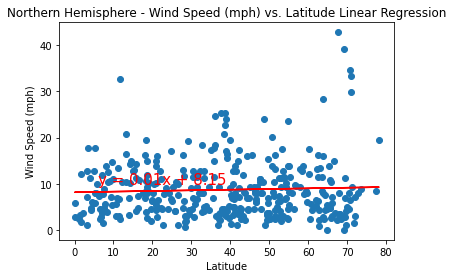

In [45]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = -0.02x + 6.97
The r-squared is: -0.06579532394093823
The regression does not display much of a correlation between the data sets.


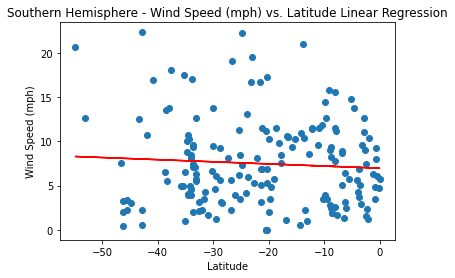

In [46]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

**Discussion about the linear relationship:** No strong correlation between Latitude and Wind Speed in either hemisphere.